In [1]:
import tensorflow as tf
import tensorflow_datasets as tfds
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt

In [2]:
# Load the dataset
(ds_train, ds_test), ds_info = tfds.load(
    'cats_vs_dogs',
    split=['train[:80%]', 'train[80%:]'],
    shuffle_files=True,
    as_supervised=True,
    with_info=True,
)

In [3]:
IMG_SIZE = 150

def preprocess(image, label):
    image = tf.image.resize(image, (IMG_SIZE, IMG_SIZE))
    image = image / 255.0
    return image, label

AUTOTUNE = tf.data.experimental.AUTOTUNE

ds_train = ds_train.map(preprocess, num_parallel_calls=AUTOTUNE)
ds_train = ds_train.cache().shuffle(1000).batch(32).prefetch(buffer_size=AUTOTUNE)

ds_test = ds_test.map(preprocess, num_parallel_calls=AUTOTUNE)
ds_test = ds_test.batch(32).cache().prefetch(buffer_size=AUTOTUNE)

In [4]:
# Model building
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(IMG_SIZE, IMG_SIZE, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

In [5]:
model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])

In [6]:
# Model training
history = model.fit(
    ds_train,
    epochs=10,
    validation_data=ds_test
)

Epoch 1/10
582/582 [==============================] - 59s 86ms/step - loss: 0.6534 - accuracy: 0.6275 - val_loss: 0.5827 - val_accuracy: 0.6847
Epoch 2/10
582/582 [==============================] - 18s 31ms/step - loss: 0.5173 - accuracy: 0.7463 - val_loss: 0.4735 - val_accuracy: 0.7820
Epoch 3/10
582/582 [==============================] - 18s 31ms/step - loss: 0.4215 - accuracy: 0.8069 - val_loss: 0.4194 - val_accuracy: 0.8093
Epoch 4/10
582/582 [==============================] - 18s 31ms/step - loss: 0.3429 - accuracy: 0.8498 - val_loss: 0.4641 - val_accuracy: 0.8061
Epoch 5/10
582/582 [==============================] - 18s 31ms/step - loss: 0.2579 - accuracy: 0.8923 - val_loss: 0.4119 - val_accuracy: 0.8349
Epoch 6/10
582/582 [==============================] - 18s 31ms/step - loss: 0.1736 - accuracy: 0.9309 - val_loss: 0.5164 - val_accuracy: 0.8280
Epoch 7/10
582/582 [==============================] - 18s 31ms/step - loss: 0.1197 - accuracy: 0.9554 - val_loss: 0.5901 - val_accuracy:

In [7]:
# Save the model
model.save('cat_dog_classifier_tfds.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


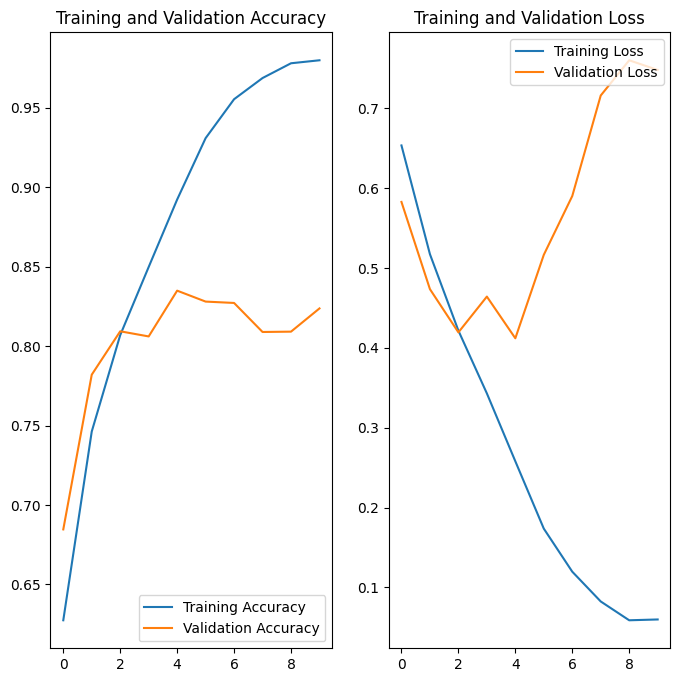

In [8]:
# Plot training history
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(10)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [9]:
# Prediction function
def predict_image(image_path):
    img = tf.keras.utils.load_img(image_path, target_size=(IMG_SIZE, IMG_SIZE))
    img_array = tf.keras.utils.img_to_array(img)
    img_array = tf.expand_dims(img_array, 0) / 255.0  # Create a batch

    predictions = model.predict(img_array)
    if predictions[0] > 0.5:
        print("This is a dog.")
    else:
        print("This is a cat.")

In [11]:
# Example usage
predict_image('/content/cat.jpeg')

1/1 [==============================] - 0s 82ms/step
This is a cat.
